# Helper functions

In [25]:
def normalize_spectrum(file_path):
    
    #load in spectrum data from txt
    spec = np.genfromtxt(file_path)
    
    #truncate to visible range
    spec_trunc = spec[np.logical_and(spec[:,0]>=380,spec[:,0]<=780)]
    
    #normalize the spectrum with respect to area
    area = np.sum(spec_trunc[:,1][:-1]*np.diff(spec_trunc[:,0][:]))
    
    return spec_trunc[:,0],spec_trunc[:,1]/area

def rebin_spectrum(axis, spec, bins, bkg=None):
    
    #sort spectrum into cmf bins
    ind = np.digitize(axis,bins)
    
    mean_spec = np.zeros(len(bins))
    
    #if background is provided, subtract background
    if bkg:
        for i in range(1,len(bins)):
            cond = np.where(ind==i)
            mean_spec[i-1] = np.nanmean(spec[cond]-bkg[cond])
    
    #otherwise, just take the mean in each bin
    else:
        for i in range(1,len(bins)):
            cond = np.where(ind==i)
            mean_spec[i-1] = np.nanmean(spec[cond])
    
    return mean_spec

# Raw spectra

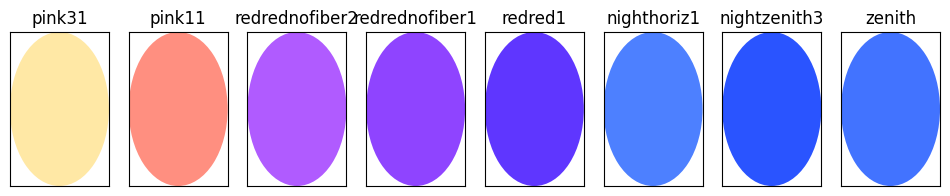

In [73]:
specs = ['pink31', "pink11",'redrednofiber2', 'redrednofiber1', "redred1", 'nighthoriz1','nightzenith3','zenith']
rgb_vals = [];

fig,ax = plt.subplots(1,len(specs),figsize=(12,2))

lam = np.arange(380.,781.,5)

cs = cs_srgb

for i in range(len(specs)):
    spec_name = './spectra/'+specs[i]+'.txt'
    
    axis, spec_norm = normalize_spectrum(spec_name)
    
    spec_mean = rebin_spectrum(axis,spec_norm,lam)
    
    html_rgb = cs.spec_to_rgb(spec_mean)
    rgb_vals.append(html_rgb)
    
    circle = Circle(xy=(0,0), radius=1, fc=html_rgb)
    
    ax[i].set_xlim(-1,1)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(specs[i])
    
    ax[i].add_patch(circle)

In [79]:
np.round(np.array(rgb_vals)*255)

array([[255., 232., 165.],
       [255., 143., 128.],
       [176.,  91., 255.],
       [143.,  68., 255.],
       [ 95.,  54., 255.],
       [ 77., 128., 255.],
       [ 42.,  84., 255.],
       [ 66., 115., 255.]])

# Arbitrary correction

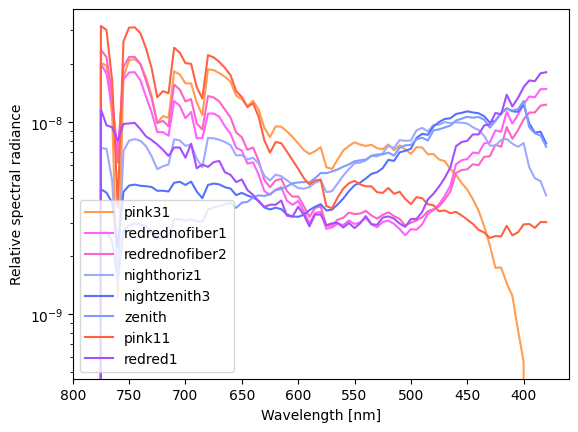

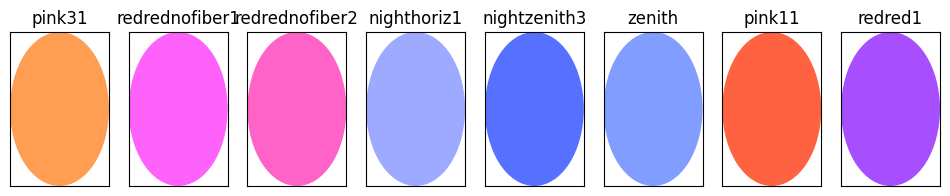

In [68]:
# plot all the spectra
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
scale_factor = (lam**-2)[::-1] # have to flip because numpy messes w the order
#scale_factor = 1
for i in range(len(specs)):
    spec_name = './spectra/'+specs[i]+'.txt'
    
    axis, spec_norm = normalize_spectrum(spec_name)
    
    
    spec_mean = rebin_spectrum(axis,spec_norm,lam)
    
    html_rgb = cs.spec_to_rgb(spec_mean*scale_factor, out_fmt='html')

    plt.plot(lam, spec_mean*scale_factor, color=html_rgb, label=specs[i])
    
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_ylabel("Relative spectral radiance")
ax.set_xlabel("Wavelength [nm]")
ax.legend()

fig,ax = plt.subplots(1,len(specs),figsize=(12,2))
for i in range(len(specs)):
    spec_name = './spectra/'+specs[i]+'.txt'
    axis, spec_norm = normalize_spectrum(spec_name)
    
    spec_mean = rebin_spectrum(axis,spec_norm,lam)
    html_rgb = cs.spec_to_rgb(spec_mean*scale_factor, out_fmt='html')
    circle = Circle(xy=(0,0), radius=1, fc=html_rgb)
    
    ax[i].set_xlim(-1,1)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(specs[i])
    
    ax[i].add_patch(circle)

# Subtract blue sky spectrum

In [ ]:
# plot all the spectra
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
scale_factor = (lam**-2)[::-1] # have to flip because numpy messes w the order
scale_factor = 1

# get blue light spectrum
def blue_sky(wavelengths):
    
    return null

for i in range(len(specs)):
    spec_name = './spectra/'+specs[i]+'.txt'
    
    axis, spec_norm = normalize_spectrum(spec_name)
    
    
    spec_mean = rebin_spectrum(axis,spec_norm,lam)
    
    html_rgb = cs.spec_to_rgb(spec_mean*scale_factor, out_fmt='html')

    plt.plot(lam, spec_mean*scale_factor, color=html_rgb, label=specs[i])
    
ax.invert_xaxis()
ax.set_yscale('log')
ax.set_ylabel("Relative spectral radiance")
ax.set_xlabel("Wavelength [nm]")
ax.legend()

fig,ax = plt.subplots(1,len(specs),figsize=(12,2))
for i in range(len(specs)):
    spec_name = './spectra/'+specs[i]+'.txt'
    axis, spec_norm = normalize_spectrum(spec_name)
    
    spec_mean = rebin_spectrum(axis,spec_norm,lam)
    html_rgb = cs.spec_to_rgb(spec_mean*scale_factor, out_fmt='html')
    circle = Circle(xy=(0,0), radius=1, fc=html_rgb)
    
    ax[i].set_xlim(-1,1)
    ax[i].set_ylim(-1,1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(specs[i])
    
    ax[i].add_patch(circle)